# Baseball Case Study

In [3]:
##importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#importing dataset
df=pd.read_csv('Baseball.csv')

In [5]:
#displaying the first 5 rows of the dataset
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.shape

(30, 17)

The dataset has 17 columns including the output column and 30 rows

In [7]:
#type of dataset we are dealing with
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
#checking if there are any missing values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no missing values

In [9]:
#statistical analysis
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [11]:
df.rename(columns={'W':'Number of predicted wins','R':'Runs','AB':'At Bats','H':' Hits','2B':'Doubles','3B':'Triples',
                   'HR':'Homeruns','BB':'Walks','SO':'Strikeouts','SB':'Stolen Bases','RA':'Runs Allowed','ER':'Earned Runs',
                   'ERA':'Earned Run Average','SHO':'Shutouts','SV':'Saves','E':'Errors'},inplace=True)


In [12]:
df.head()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


array([[<AxesSubplot:title={'center':'Number of predicted wins'}>,
        <AxesSubplot:title={'center':'Runs'}>,
        <AxesSubplot:title={'center':'At Bats'}>,
        <AxesSubplot:title={'center':' Hits'}>],
       [<AxesSubplot:title={'center':'Doubles'}>,
        <AxesSubplot:title={'center':'Triples'}>,
        <AxesSubplot:title={'center':'Homeruns'}>,
        <AxesSubplot:title={'center':'Walks'}>],
       [<AxesSubplot:title={'center':'Strikeouts'}>,
        <AxesSubplot:title={'center':'Stolen Bases'}>,
        <AxesSubplot:title={'center':'Runs Allowed'}>,
        <AxesSubplot:title={'center':'Earned Runs'}>],
       [<AxesSubplot:title={'center':'Earned Run Average'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'Shutouts'}>,
        <AxesSubplot:title={'center':'Saves'}>],
       [<AxesSubplot:title={'center':'Errors'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

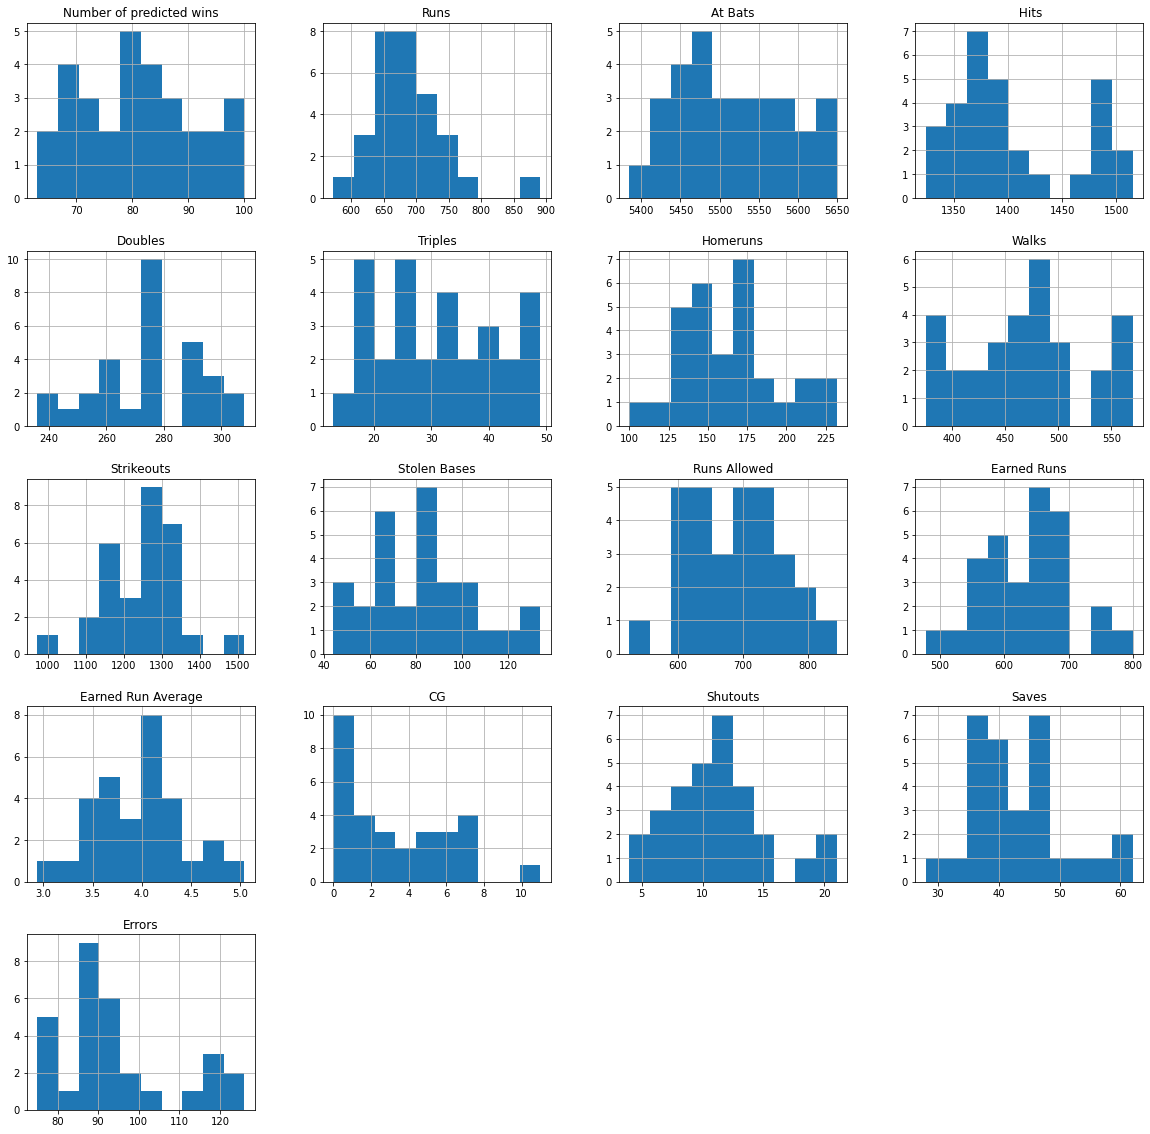

In [16]:
#checking normal distribution of all variables
df.hist(figsize=(20,20),grid = True )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

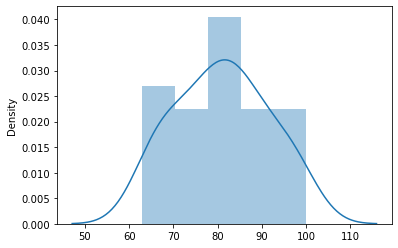

In [13]:
sns.distplot(x=df['Number of predicted wins'])

<AxesSubplot:>

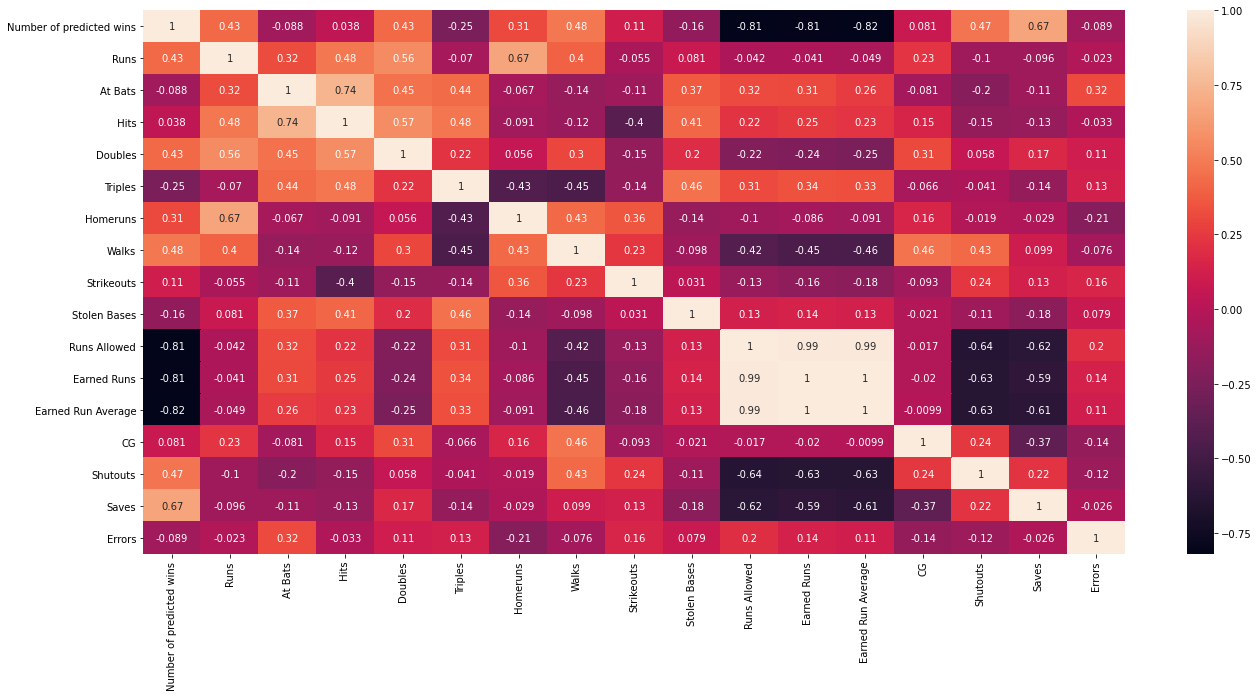

In [14]:
#correlation in the data set
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(), annot =True)

<AxesSubplot:xlabel='Runs Allowed', ylabel='Number of predicted wins'>

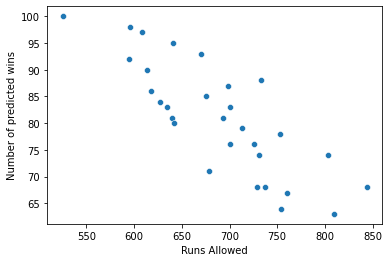

In [43]:
sns.scatterplot(x=df['Runs Allowed'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Runs', ylabel='Number of predicted wins'>

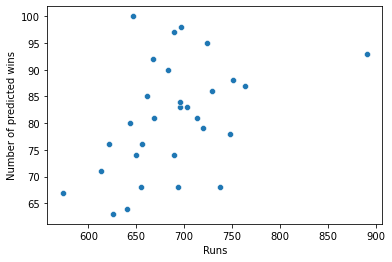

In [25]:
sns.scatterplot(x=df['Runs'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='At Bats', ylabel='Number of predicted wins'>

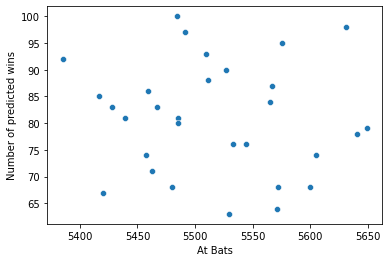

In [26]:
sns.scatterplot(x=df['At Bats'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel=' Hits', ylabel='Number of predicted wins'>

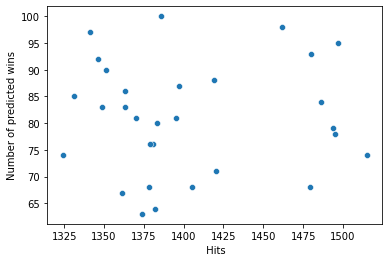

In [42]:
sns.scatterplot(x=df[' Hits'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Doubles', ylabel='Number of predicted wins'>

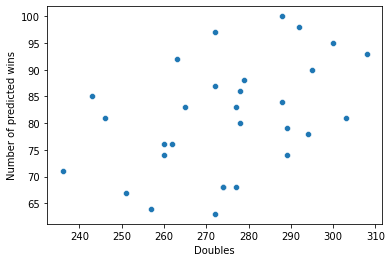

In [29]:
sns.scatterplot(x=df['Doubles'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Triples', ylabel='Number of predicted wins'>

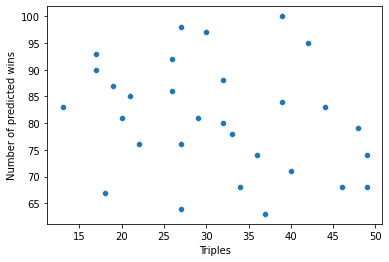

In [30]:
sns.scatterplot(x=df['Triples'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Homeruns', ylabel='Number of predicted wins'>

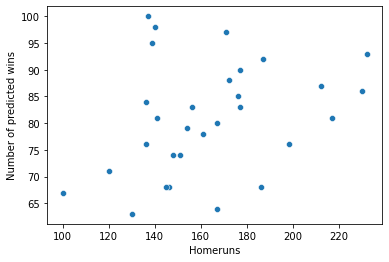

In [31]:
sns.scatterplot(x=df['Homeruns'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Walks', ylabel='Number of predicted wins'>

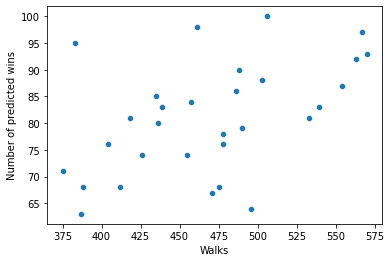

In [32]:
sns.scatterplot(x=df['Walks'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Strikeouts', ylabel='Number of predicted wins'>

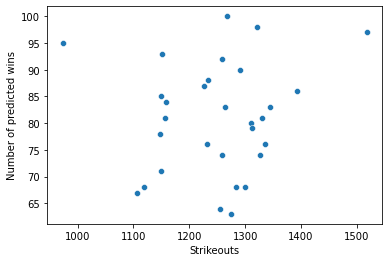

In [33]:
sns.scatterplot(x=df['Strikeouts'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Stolen Bases', ylabel='Number of predicted wins'>

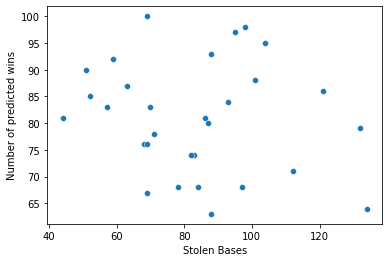

In [34]:
sns.scatterplot(x=df['Stolen Bases'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Earned Runs', ylabel='Number of predicted wins'>

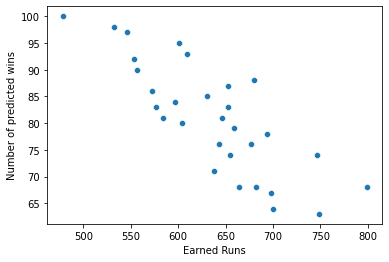

In [35]:
sns.scatterplot(x=df['Earned Runs'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Earned Run Average', ylabel='Number of predicted wins'>

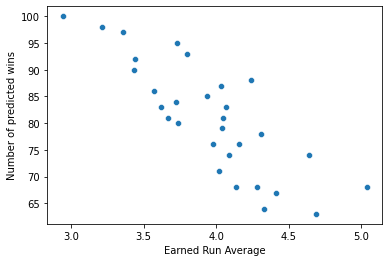

In [36]:
sns.scatterplot(x=df['Earned Run Average'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Shutouts', ylabel='Number of predicted wins'>

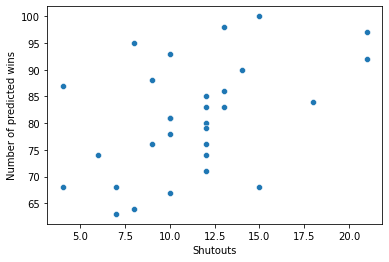

In [37]:
sns.scatterplot(x=df['Shutouts'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Saves', ylabel='Number of predicted wins'>

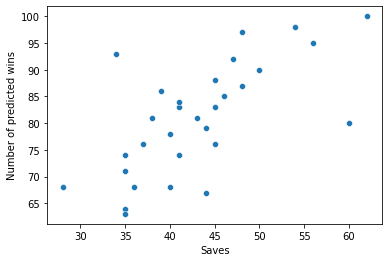

In [39]:
sns.scatterplot(x=df['Saves'],y=df['Number of predicted wins'])

<AxesSubplot:xlabel='Errors', ylabel='Number of predicted wins'>

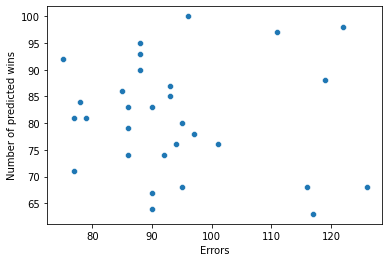

In [40]:
sns.scatterplot(x=df['Errors'],y=df['Number of predicted wins'])

In [47]:
#seperating feature and target 
x=df.drop('Number of predicted wins',axis=1)#feature
y=df['Number of predicted wins']#target


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=40)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x_train)

In [52]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [54]:
lr=LinearRegression()

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
lr.score(x_test,y_test)

0.45271570626964963

In [57]:
y_pred=lr.predict(x_test)

In [58]:
r2_score(y_test,y_pred)

0.45271570626964963

In [1]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)


NameError: name 'clf' is not defined